In [1]:
from sklearn.datasets import load_digits
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

## Dataset Preparation

In [3]:
# Load the sklearn MNIST Dataset
digits = load_digits()

In [5]:
X = digits.data # data gives the x values
Y = digits.target # target gives the y values

In [8]:
print(X.shape) # Each image has 64 features and there are 1797 examples
# This shows that each image is 8x8 image

(1797, 64)


In [7]:
print(Y.shape)

(1797,)


## Visualization

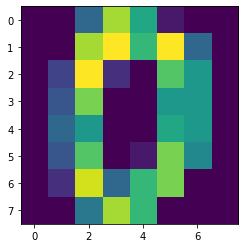

In [9]:
plt.imshow(X[0].reshape(8,8))